<a href="https://colab.research.google.com/github/quantwav/lab3/blob/main/0320_2230_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook setup**

In [ ]:
%matplotlib inline
# Use %matplotlib ipympl or %matplotlib widget if you want interactive matplotlib plots
#%matplotlib widget

# reloads modules automatically before entering the execution of code typed at the IPython prompt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Package Imports
!pip install linearmodels
import linearmodels as lm  #for panel data econometrics
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys
import time
import os

# To display dataframes as interactive tables in the notebook:
!pip install itables
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

# Add current directory to access common code in dp.py
#sys.path.insert(0, '/Users/mrrobert/Dropbox/mrrobert/Data')
#sys.path.insert(0, '.')

#import data_paths as dp

# Tolerance for tests
TOL = 1.0e-8

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


<IPython.core.display.Javascript object>

In [ ]:
if not os.path.exists("crime_data_2023demo.csv"):
    !gdown 1ngS7TgJyoAJ4LrvmHTMZ9F01ml8YWWjS

'gdown' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [ ]:
df_raw_crime = (
    pd.read_csv('incidents_part1_part2 (1).csv',parse_dates=['dispatch_date'])
)
df_raw_crime

the_geom  cartodb_id  \
0       0101000020E6100000A51C8299A5C752C006342AD3DCFF...           2   
1       0101000020E6100000F9245E3B64CC52C0B7195D940FF6...           4   
2       0101000020E6100000118A52E7F6C052C0CFF41263190C...           7   
3       0101000020E6100000E1F9FB7B5FC552C0159C0B6D4A02...         123   
4       0101000020E6100000D1CCD5875CCA52C014B723FFC005...         126   
...                                                   ...         ...   
169012  0101000020E6100000F5F983DCE0C952C063382A79EDF5...     3207029   
169013  0101000020E6100000544D94AD83CB52C019460FB6B7FD...     3207030   
169014  0101000020E6100000549B6AF3A0CE52C093C74FBADFFD...     3207031   
169015  0101000020E610000065E33DDED6CD52C0B8BFA35BE902...     3207032   
169016  0101000020E6100000570BAA153FC752C03806AE3C1206...     3207033   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F0000F80DE2A145E65FC1E5EC7592BE8F...       114       25   
1       0101000020110F00000426B7CE54EE5FC1C5E06D37E284...       116        1   
2       0101000020110F00006728CED7EBDA5FC169DB64F8519D...       119        8   
3       0101000020110F00009D28D4D968E25FC13CD5C3D06F92...        96       15   
4       0101000020110F00002F28E30AE2EA5FC10090A3314796...        99       14   
...                                                   ...       ...      ...   
169012  0101000020110F0000CFDC58FA0FEA5FC1EEFC5B72BC84...  11907416        3   
169013  0101000020110F000047AC5161D7EC5FC142AA0ADD5D8D...  11936133       22   
169014  0101000020110F00004EEFD3A021F25FC19C03CE378A8D...  11938562       19   
169015  0101000020110F0000A128D35ECAF05FC15A82B9122093...  11941456        5   
169016  0101000020110F0000DEB5128097E55FC124802153A196...  11963779       35   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
0        3  2023-03-11 17:12:00+00    2023-03-11      12:12:00  12.0   
1        1  2023-03-11 18:31:00+00    2023-03-11      13:31:00  13.0   
2        2  2023-03-11 22:13:00+00    2023-03-11      17:13:00  17.0   
3        1  2023-03-11 12:42:00+00    2023-03-11      07:42:00   7.0   
4        1  2023-03-12 00:54:00+00    2023-03-11      19:54:00  19.0   
...     ..                     ...           ...           ...   ...   
169012   2  2023-12-25 22:09:00+00    2023-12-25      17:09:00  17.0   
169013   4  2023-12-26 14:31:00+00    2023-12-26      09:31:00   9.0   
169014   3  2023-12-26 17:36:00+00    2023-12-26      12:36:00  12.0   
169015   1  2023-12-26 17:12:00+00    2023-12-26      12:12:00  12.0   
169016   1  2023-12-26 17:08:00+00    2023-12-26      12:08:00  12.0   

              dc_key             location_block  ucr_general  \
0       2.023250e+11    3300 BLOCK HARTVILLE ST          300   
1       2.023010e+11       2400 BLOCK S 28TH ST          600   
2       2.023080e+11  9800 BLOCK Roosevelt Blvd          600   
3       2.023150e+11      4700 BLOCK GRISCOM ST          600   
4       2.023140e+11        5500 BLOCK BLOYD ST          300   
...              ...                        ...          ...   
169012  2.023031e+11       400 BLOCK JACKSON ST         2600   
169013  2.023221e+11       1700 BLOCK N 28TH ST          800   
169014  2.023191e+11      1700 BLOCK N PEACH ST         1100   
169015  2.023050e+11      100 BLOCK KINGSLEY ST         1100   
169016  2.023351e+11      200 BLOCK FARISTON DR         1100   

         text_general_code    point_x    point_y        lat        lng  
0       Robbery No Firearm -75.119482  39.998927  39.998927 -75.119482  
1       Theft from Vehicle -75.193618  39.922350  39.922350 -75.193618  
2                   Thefts -75.015070  40.094525  40.094525 -75.015070  
3                   Thefts -75.083953  40.017896  40.017896 -75.083953  
4       Robbery No Firearm -75.161898  40.044952  40.044952 -75.161898  
...                    ...        ...        ...        ...        ...  
169012  All Other Offenses -75.154349  39.921310  39.921310 -75.15

In [ ]:
from sklearn.model_selection import train_test_split

# Duplicates and outliers
df_raw_crime.drop_duplicates(inplace=True)
df_raw_crime.dropna()

# df_raw_crime.replace({'X': -120.5, 'Y': 90.0}, pd.NA, inplace=True)

df_raw_crime

the_geom  cartodb_id  \
0       0101000020E6100000A51C8299A5C752C006342AD3DCFF...           2   
1       0101000020E6100000F9245E3B64CC52C0B7195D940FF6...           4   
2       0101000020E6100000118A52E7F6C052C0CFF41263190C...           7   
3       0101000020E6100000E1F9FB7B5FC552C0159C0B6D4A02...         123   
4       0101000020E6100000D1CCD5875CCA52C014B723FFC005...         126   
...                                                   ...         ...   
169012  0101000020E6100000F5F983DCE0C952C063382A79EDF5...     3207029   
169013  0101000020E6100000544D94AD83CB52C019460FB6B7FD...     3207030   
169014  0101000020E6100000549B6AF3A0CE52C093C74FBADFFD...     3207031   
169015  0101000020E610000065E33DDED6CD52C0B8BFA35BE902...     3207032   
169016  0101000020E6100000570BAA153FC752C03806AE3C1206...     3207033   

                                     the_geom_webmercator  objectid  dc_dist  \
0       0101000020110F0000F80DE2A145E65FC1E5EC7592BE8F...       114       25   
1       0101000020110F00000426B7CE54EE5FC1C5E06D37E284...       116        1   
2       0101000020110F00006728CED7EBDA5FC169DB64F8519D...       119        8   
3       0101000020110F00009D28D4D968E25FC13CD5C3D06F92...        96       15   
4       0101000020110F00002F28E30AE2EA5FC10090A3314796...        99       14   
...                                                   ...       ...      ...   
169012  0101000020110F0000CFDC58FA0FEA5FC1EEFC5B72BC84...  11907416        3   
169013  0101000020110F000047AC5161D7EC5FC142AA0ADD5D8D...  11936133       22   
169014  0101000020110F00004EEFD3A021F25FC19C03CE378A8D...  11938562       19   
169015  0101000020110F0000A128D35ECAF05FC15A82B9122093...  11941456        5   
169016  0101000020110F0000DEB5128097E55FC124802153A196...  11963779       35   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
0        3  2023-03-11 17:12:00+00    2023-03-11      12:12:00  12.0   
1        1  2023-03-11 18:31:00+00    2023-03-11      13:31:00  13.0   
2        2  2023-03-11 22:13:00+00    2023-03-11      17:13:00  17.0   
3        1  2023-03-11 12:42:00+00    2023-03-11      07:42:00   7.0   
4        1  2023-03-12 00:54:00+00    2023-03-11      19:54:00  19.0   
...     ..                     ...           ...           ...   ...   
169012   2  2023-12-25 22:09:00+00    2023-12-25      17:09:00  17.0   
169013   4  2023-12-26 14:31:00+00    2023-12-26      09:31:00   9.0   
169014   3  2023-12-26 17:36:00+00    2023-12-26      12:36:00  12.0   
169015   1  2023-12-26 17:12:00+00    2023-12-26      12:12:00  12.0   
169016   1  2023-12-26 17:08:00+00    2023-12-26      12:08:00  12.0   

              dc_key             location_block  ucr_general  \
0       2.023250e+11    3300 BLOCK HARTVILLE ST          300   
1       2.023010e+11       2400 BLOCK S 28TH ST          600   
2       2.023080e+11  9800 BLOCK Roosevelt Blvd          600   
3       2.023150e+11      4700 BLOCK GRISCOM ST          600   
4       2.023140e+11        5500 BLOCK BLOYD ST          300   
...              ...                        ...          ...   
169012  2.023031e+11       400 BLOCK JACKSON ST         2600   
169013  2.023221e+11       1700 BLOCK N 28TH ST          800   
169014  2.023191e+11      1700 BLOCK N PEACH ST         1100   
169015  2.023050e+11      100 BLOCK KINGSLEY ST         1100   
169016  2.023351e+11      200 BLOCK FARISTON DR         1100   

         text_general_code    point_x    point_y        lat        lng  
0       Robbery No Firearm -75.119482  39.998927  39.998927 -75.119482  
1       Theft from Vehicle -75.193618  39.922350  39.922350 -75.193618  
2                   Thefts -75.015070  40.094525  40.094525 -75.015070  
3                   Thefts -75.083953  40.017896  40.017896 -75.083953  
4       Robbery No Firearm -75.161898  40.044952  40.044952 -75.161898  
...                    ...        ...        ...        ...        ...  
169012  All Other Offenses -75.154349  39.921310  39.921310 -75.15

In [ ]:
# Split the dataset into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(df_raw_crime, test_size=0.2, random_state=42)

# Print the sizes of the training and testing sets
print("Training set size:", len(train_data))
print("Testing set size:", len(test_data))
train_data

Training set size: 135213
Testing set size: 33804


the_geom  cartodb_id  \
109361  0101000020E61000002F7BA73CD9C452C0508ADA262A04...     3110090   
365     0101000020E610000020B9D2BEFBC952C0E8BA74BC17F5...        8014   
146152  0101000020E61000001F4A93D608BF52C09858F00D4B08...     3147097   
94974   0101000020E6100000B67BC1C0D6C952C0A6174A60D203...     3095701   
77016   0101000020E61000001838C924DDCA52C0A3E68AD67AFF...     3077743   
...                                                   ...         ...   
119879  0101000020E610000076F10A862BC952C0AB430B5CE0F4...     3120608   
103694  0101000020E6100000C9C62874C3C852C09AA8AD2ADEFE...     3104423   
131932  0101000020E610000096ED01C220CF52C00AF4EC6684F6...     3132661   
146867  0101000020E6100000913D6B4C42CF52C04220FA622DF6...     3147976   
121958  0101000020E6100000DF4F8D972EC552C055805261AA05...     3122687   

                                     the_geom_webmercator  objectid  dc_dist  \
109361  0101000020110F00009BD675D184E15FC1CF5734E08394...   7491155       15   
365     0101000020110F0000D39EA3A43DEA5FC173D88AC3CF83...      9833        3   
146152  0101000020110F00007A61879FA4D75FC1AEA3567B1899...  12136167        8   
94974   0101000020110F000063DCC6CEFEE95FC1D5B615842294...   6681312       35   
77016   0101000020110F0000D5C33A81BCEB5FC115F19DF0518F...   5007411       39   
...                                                   ...       ...      ...   
119879  0101000020110F0000EC0C1BF5DBE85FC10DFE29729283...   8569049        3   
103694  0101000020110F0000F8872F2F2BE85FC1255FEB41A48E...   7071890       26   
131932  0101000020110F0000E8B3A5B8FAF25FC1D0FD8C976385...   9979291       12   
146867  0101000020110F000019F287B133F35FC1C242D0390385...  12136535       12   
121958  0101000020110F00007AB468CD15E25FC1A8B15E1A2E96...   8568289        2   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  \
109361   2  2023-08-14 04:49:00+00    2023-08-14      00:49:00   NaN   
365      2  2023-02-19 15:52:00+00    2023-02-19      10:52:00  10.0   
146152   2  2023-11-19 16:27:00+00    2023-11-19      11:27:00  11.0   
94974    3  2023-07-23 20:42:00+00    2023-07-23      16:42:00   NaN   
77016    3  2023-05-31 18:34:00+00    2023-05-31      14:34:00   NaN   
...     ..                     ...           ...           ...   ...   
119879   3  2023-09-15 14:53:00+00    2023-09-15      10:53:00   NaN   
103694   1  2023-07-24 20:55:00+00    2023-07-24      16:55:00   NaN   
131932   2  2023-10-27 12:39:00+00    2023-10-27      08:39:00   NaN   
146867   2  2023-11-24 14:02:00+00    2023-11-24      09:02:00   9.0   
121958   1  2023-09-18 11:46:00+00    2023-09-18      07:46:00   NaN   

              dc_key             location_block  ucr_general  \
109361  2.023151e+11       1600 BLOCK BENNER ST          500   
365     2.023030e+11        400 BLOCK OREGON AV          600   
146152  2.023080e+11    9900 BLOCK FRANKFORD AV          600   
94974   2.023350e+11    1800 BLOCK W RUSCOMB ST          500   
77016   2.023390e+11    2700 BLOCK N BONSALL ST         2600   
...              ...                        ...          ...   
119879  2.023030e+11       0 BLOCK E Oregon Ave         1100   
103694  2.023260e+11      200 BLOCK W LEHIGH AV          600   
131932  2.023121e+11        2100 BLOCK GOULD ST         2600   
146867  2.023121e+11     6700 BLOCK WOODLAND AV          600   
121958  2.023020e+11  SUMMERDALE AV & GILHAM ST         1400   

                  text_general_code    point_x    point_y        lat  \
109361         Burglary Residential -75.075759  40.032536  40.032536   
365                          Thefts -75.155990  39.914787  39.914787   
146152                       Thefts -74.984914  40.064790  40.064790   
94974          Burglary Residential -75.153732  40.029858  40.029858   
77016            All Other Offenses -75.169748  39.995936  39.995936   
...                             ...        ...        ...        ...   
119879                        Fraud -75.143281  39.913097  39.913097   
1

In [ ]:
train_data.duplicated().sum()

0

C:\Users\windows\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\windows\AppData\Local\Temp\ipykernel_424\2184127183.py:26: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


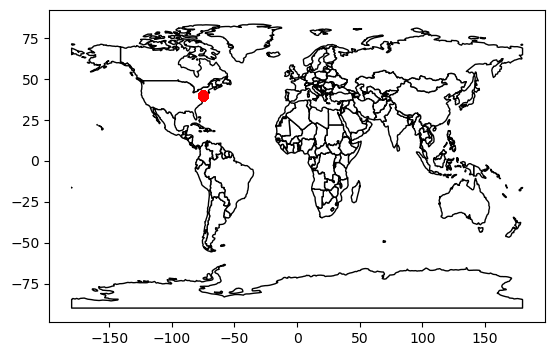

In [ ]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

def create_gdf(train_data):
    # Create a copy of the DataFrame
    gdf = train_data.copy()

    # Combine the latitude and longitude columns into a single 'Coordinates' column
    gdf['Coordinates'] = list(zip(gdf.lng, gdf.lat))

    # Convert the 'Coordinates' column to Point objects
    gdf.Coordinates = gdf.Coordinates.apply(Point)

    # Create a GeoDataFrame from the DataFrame with geometry set to 'Coordinates'
    # and coordinate reference system (CRS) set to EPSG 4326
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})

    return gdf

# You need to replace 'df' with your actual dataset
train_gdf = create_gdf(train_data)

# Read world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the world map with land areas in white and boundaries in black
ax = world.plot(color='white', edgecolor='black')

# Plot the training GeoDataFrame on top of the world map with red color
train_gdf.plot(ax=ax, color='red')

# Show the plot
plt.show()


C:\Users\windows\AppData\Local\Temp\ipykernel_424\736431723.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=incident_count_per_day, shade=True)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


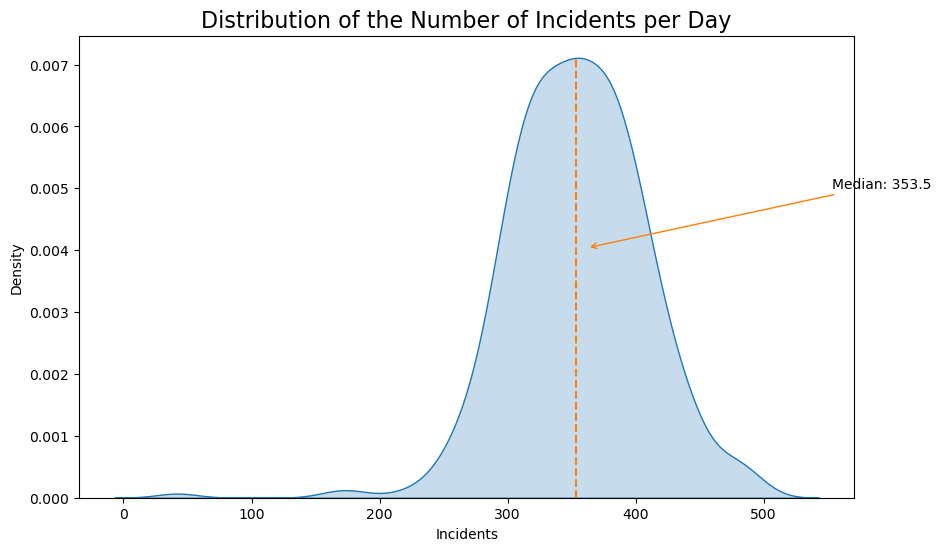

In [ ]:
col = sns.color_palette()

# Calculate the date and hour
train_data['Date'] = train_data.dispatch_date.dt.date
train_data['Hour'] = train_data.dispatch_date.dt.hour

# Create the figure
plt.figure(figsize=(10, 6))

# Calculate the number of incidents per day and generate a kernel density plot
incident_count_per_day = train_data.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=incident_count_per_day, shade=True)

# Plot a dashed line at the median and add annotation
median_value = incident_count_per_day.median()
plt.axvline(x=median_value, ymax=0.95, linestyle='--', color=col[1])
plt.annotate('Median: ' + str(median_value),
             xy=(median_value, 0.004),
             xytext=(median_value + 200, 0.005),
             arrowprops=dict(arrowstyle='->', color=col[1], shrinkB=10))

# Set the title and axis labels
plt.title('Distribution of the Number of Incidents per Day', fontdict={'fontsize': 16})
plt.xlabel('Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()


In [ ]:
# Extract the weekday information from the 'dispatch_date' column and assign it to a new column 'weekday'
train_data['weekday'] = train_data['dispatch_date'].dt.weekday

# Define a mapping between numerical representation of weekdays and their corresponding names
weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Map the numerical representation of weekdays to their corresponding names using the mapping defined above
train_data['weekday'] = train_data['weekday'].map(weekday_mapping)

# Display the DataFrame with the added 'weekday' column containing the names of weekdays
train_data


the_geom  cartodb_id  \
109361  0101000020E61000002F7BA73CD9C452C0508ADA262A04...     3110090   
365     0101000020E610000020B9D2BEFBC952C0E8BA74BC17F5...        8014   
146152  0101000020E61000001F4A93D608BF52C09858F00D4B08...     3147097   
94974   0101000020E6100000B67BC1C0D6C952C0A6174A60D203...     3095701   
77016   0101000020E61000001838C924DDCA52C0A3E68AD67AFF...     3077743   
...                                                   ...         ...   
119879  0101000020E610000076F10A862BC952C0AB430B5CE0F4...     3120608   
103694  0101000020E6100000C9C62874C3C852C09AA8AD2ADEFE...     3104423   
131932  0101000020E610000096ED01C220CF52C00AF4EC6684F6...     3132661   
146867  0101000020E6100000913D6B4C42CF52C04220FA622DF6...     3147976   
121958  0101000020E6100000DF4F8D972EC552C055805261AA05...     3122687   

                                     the_geom_webmercator  objectid  dc_dist  \
109361  0101000020110F00009BD675D184E15FC1CF5734E08394...   7491155       15   
365     0101000020110F0000D39EA3A43DEA5FC173D88AC3CF83...      9833        3   
146152  0101000020110F00007A61879FA4D75FC1AEA3567B1899...  12136167        8   
94974   0101000020110F000063DCC6CEFEE95FC1D5B615842294...   6681312       35   
77016   0101000020110F0000D5C33A81BCEB5FC115F19DF0518F...   5007411       39   
...                                                   ...       ...      ...   
119879  0101000020110F0000EC0C1BF5DBE85FC10DFE29729283...   8569049        3   
103694  0101000020110F0000F8872F2F2BE85FC1255FEB41A48E...   7071890       26   
131932  0101000020110F0000E8B3A5B8FAF25FC1D0FD8C976385...   9979291       12   
146867  0101000020110F000019F287B133F35FC1C242D0390385...  12136535       12   
121958  0101000020110F00007AB468CD15E25FC1A8B15E1A2E96...   8568289        2   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  ...  \
109361   2  2023-08-14 04:49:00+00    2023-08-14      00:49:00   NaN  ...   
365      2  2023-02-19 15:52:00+00    2023-02-19      10:52:00  10.0  ...   
146152   2  2023-11-19 16:27:00+00    2023-11-19      11:27:00  11.0  ...   
94974    3  2023-07-23 20:42:00+00    2023-07-23      16:42:00   NaN  ...   
77016    3  2023-05-31 18:34:00+00    2023-05-31      14:34:00   NaN  ...   
...     ..                     ...           ...           ...   ...  ...   
119879   3  2023-09-15 14:53:00+00    2023-09-15      10:53:00   NaN  ...   
103694   1  2023-07-24 20:55:00+00    2023-07-24      16:55:00   NaN  ...   
131932   2  2023-10-27 12:39:00+00    2023-10-27      08:39:00   NaN  ...   
146867   2  2023-11-24 14:02:00+00    2023-11-24      09:02:00   9.0  ...   
121958   1  2023-09-18 11:46:00+00    2023-09-18      07:46:00   NaN  ...   

                   location_block ucr_general            text_general_code  \
109361       1600 BLOCK BENNER ST         500         Burglary Residential   
365           400 BLOCK OREGON AV         600                       Thefts   
146152    9900 BLOCK FRANKFORD AV         600                       Thefts   
94974     1800 BLOCK W RUSCOMB ST         500         Burglary Residential   
77016     2700 BLOCK N BONSALL ST        2600           All Other Offenses   
...                           ...         ...                          ...   
119879       0 BLOCK E Oregon Ave        1100                        Fraud   
103694      200 BLOCK W LEHIGH AV         600                       Thefts   
131932        2100 BLOCK GOULD ST        2600           All Other Offenses   
146867     6700 BLOCK WOODLAND AV         600                       Thefts   
121958  SUMMERDALE AV & GILHAM ST        1400  Vandalism/Criminal Mischief   

          point_x    point_y        lat        lng        Date Hour    weekday  
109361 -75.075759  40.032536  40.032536 -75.075759  2023-08-14    0     Monday  
365    -75.155990  39.914787  39.914787 -75.155990  2023-02-19    0     Sunday  
146152 -74.984914  40.064790  40.064790 -74.984914  2023-11-19    0     Sunday  
94974  -75.153732  40.029

In [ ]:
data = train_data.groupby('weekday').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])
data

weekday
Monday       19930
Tuesday      19920
Wednesday    20089
Thursday     18480
Friday       18554
Saturday     16441
Sunday       16191
Name: the_geom, dtype: int64

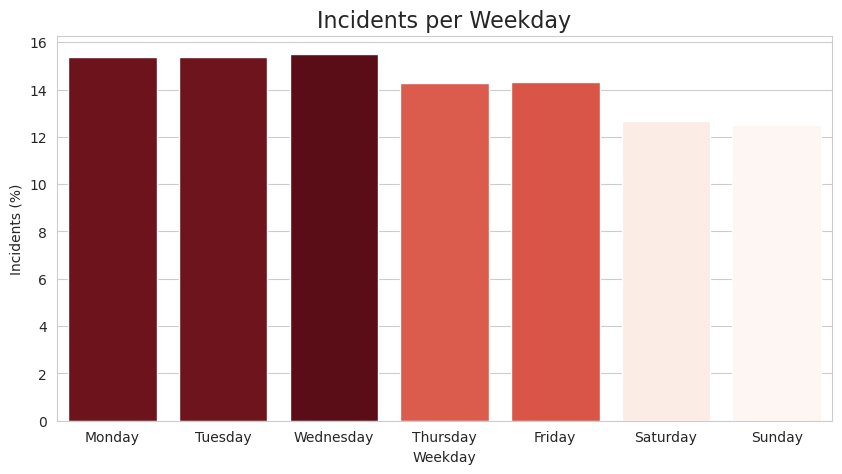

In [ ]:
from matplotlib import cm  # Importing colormap module from matplotlib

plt.figure(figsize=(10, 5))  # Creating a figure with size 10x5 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a bar plot
    ax = sns.barplot(
        x=data.index,  # X-axis data (weekdays)
        y=(data.values / data.values.sum()) * 100,  # Y-axis data (percentage of incidents)
        orient='v',  # Orientation of the bars (vertical)
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values)  # Color palette for the bars
    )

# Setting title, xlabel, and ylabel
plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

# Displaying the plot
plt.show()


In [ ]:
train_data

the_geom  cartodb_id  \
109361  0101000020E61000002F7BA73CD9C452C0508ADA262A04...     3110090   
365     0101000020E610000020B9D2BEFBC952C0E8BA74BC17F5...        8014   
146152  0101000020E61000001F4A93D608BF52C09858F00D4B08...     3147097   
94974   0101000020E6100000B67BC1C0D6C952C0A6174A60D203...     3095701   
77016   0101000020E61000001838C924DDCA52C0A3E68AD67AFF...     3077743   
...                                                   ...         ...   
119879  0101000020E610000076F10A862BC952C0AB430B5CE0F4...     3120608   
103694  0101000020E6100000C9C62874C3C852C09AA8AD2ADEFE...     3104423   
131932  0101000020E610000096ED01C220CF52C00AF4EC6684F6...     3132661   
146867  0101000020E6100000913D6B4C42CF52C04220FA622DF6...     3147976   
121958  0101000020E6100000DF4F8D972EC552C055805261AA05...     3122687   

                                     the_geom_webmercator  objectid  dc_dist  \
109361  0101000020110F00009BD675D184E15FC1CF5734E08394...   7491155       15   
365     0101000020110F0000D39EA3A43DEA5FC173D88AC3CF83...      9833        3   
146152  0101000020110F00007A61879FA4D75FC1AEA3567B1899...  12136167        8   
94974   0101000020110F000063DCC6CEFEE95FC1D5B615842294...   6681312       35   
77016   0101000020110F0000D5C33A81BCEB5FC115F19DF0518F...   5007411       39   
...                                                   ...       ...      ...   
119879  0101000020110F0000EC0C1BF5DBE85FC10DFE29729283...   8569049        3   
103694  0101000020110F0000F8872F2F2BE85FC1255FEB41A48E...   7071890       26   
131932  0101000020110F0000E8B3A5B8FAF25FC1D0FD8C976385...   9979291       12   
146867  0101000020110F000019F287B133F35FC1C242D0390385...  12136535       12   
121958  0101000020110F00007AB468CD15E25FC1A8B15E1A2E96...   8568289        2   

       psa      dispatch_date_time dispatch_date dispatch_time  hour  ...  \
109361   2  2023-08-14 04:49:00+00    2023-08-14      00:49:00   NaN  ...   
365      2  2023-02-19 15:52:00+00    2023-02-19      10:52:00  10.0  ...   
146152   2  2023-11-19 16:27:00+00    2023-11-19      11:27:00  11.0  ...   
94974    3  2023-07-23 20:42:00+00    2023-07-23      16:42:00   NaN  ...   
77016    3  2023-05-31 18:34:00+00    2023-05-31      14:34:00   NaN  ...   
...     ..                     ...           ...           ...   ...  ...   
119879   3  2023-09-15 14:53:00+00    2023-09-15      10:53:00   NaN  ...   
103694   1  2023-07-24 20:55:00+00    2023-07-24      16:55:00   NaN  ...   
131932   2  2023-10-27 12:39:00+00    2023-10-27      08:39:00   NaN  ...   
146867   2  2023-11-24 14:02:00+00    2023-11-24      09:02:00   9.0  ...   
121958   1  2023-09-18 11:46:00+00    2023-09-18      07:46:00   NaN  ...   

                   location_block ucr_general            text_general_code  \
109361       1600 BLOCK BENNER ST         500         Burglary Residential   
365           400 BLOCK OREGON AV         600                       Thefts   
146152    9900 BLOCK FRANKFORD AV         600                       Thefts   
94974     1800 BLOCK W RUSCOMB ST         500         Burglary Residential   
77016     2700 BLOCK N BONSALL ST        2600           All Other Offenses   
...                           ...         ...                          ...   
119879       0 BLOCK E Oregon Ave        1100                        Fraud   
103694      200 BLOCK W LEHIGH AV         600                       Thefts   
131932        2100 BLOCK GOULD ST        2600           All Other Offenses   
146867     6700 BLOCK WOODLAND AV         600                       Thefts   
121958  SUMMERDALE AV & GILHAM ST        1400  Vandalism/Criminal Mischief   

          point_x    point_y        lat        lng        Date Hour    weekday  
109361 -75.075759  40.032536  40.032536 -75.075759  2023-08-14    0     Monday  
365    -75.155990  39.914787  39.914787 -75.155990  2023-02-19    0     Sunday  
146152 -74.984914  40.064790  40.064790 -74.984914  2023-11-19    0     Sunday  
94974  -75.153732  40.029

In [ ]:
data = train_data.groupby('text_general_code').count().iloc[:, 0].sort_values(
    ascending=False)
#data = data.reindex(np.append(np.delete(data.index, 1), 'OTHER OFFENSES'))
data

text_general_code
Thefts                                     28375
Other Assaults                             20158
Motor Vehicle Theft                        17279
Vandalism/Criminal Mischief                13358
All Other Offenses                         10376
Theft from Vehicle                          9590
Fraud                                       5904
Aggravated Assault No Firearm               3971
Burglary Residential                        2902
Aggravated Assault Firearm                  2562
Weapon Violations                           2503
Robbery No Firearm                          2068
Narcotic / Drug Law Violations              2044
Robbery Firearm                             1982
Burglary Non-Residential                    1429
Receiving Stolen Property                   1136
Other Sex Offenses (Not Commercialized)      774
DRIVING UNDER THE INFLUENCE                  668
Arson                                        544
Rape                                         438
Offenses Against Family and Children         313
Disorderly Conduct                           297
Homicide - Criminal                          248
Prostitution and Commercialized Vice         237
Forgery and Counterfeiting                   190
Embezzlement                                 171
Liquor Law Violations                         55
Public Drunkenness                            18
Vagrancy/Loitering                             8
Homicide - Justifiable                         4
Gambling Violations                            3
Homicide - Gross Negligence                    0
Name: the_geom, dtype: int64

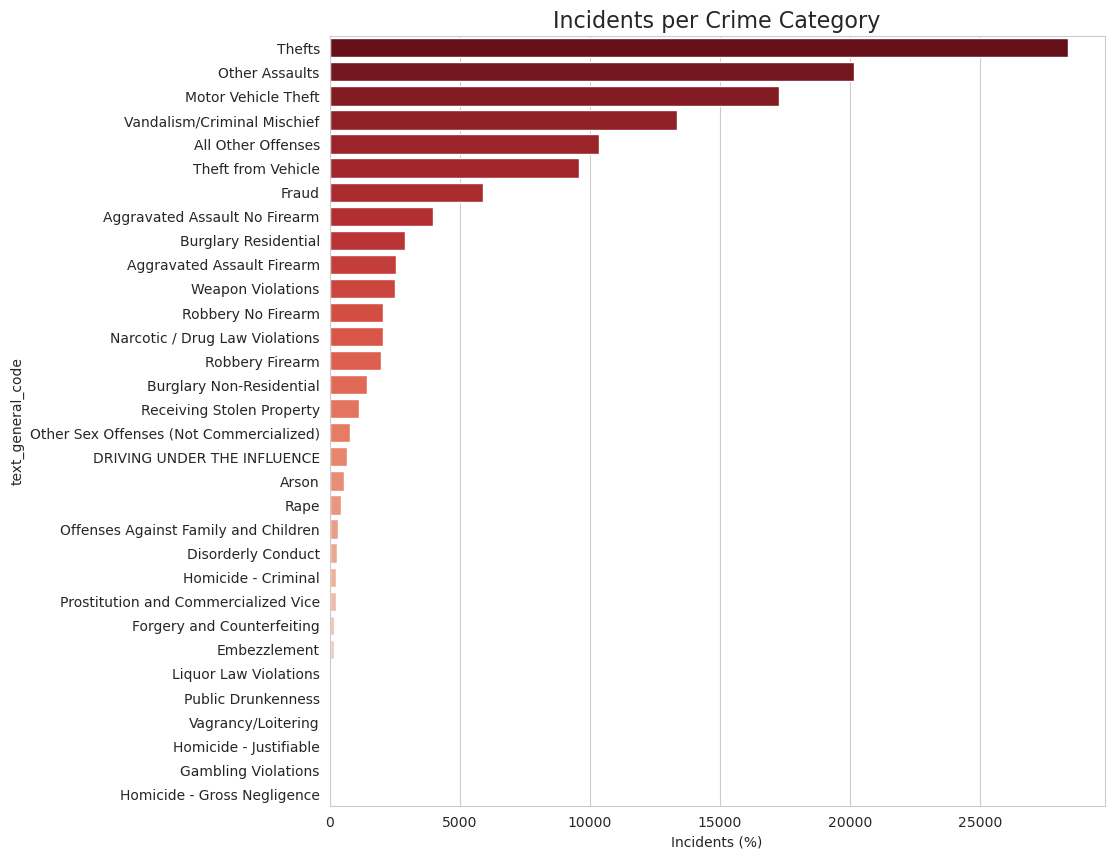

In [ ]:
plt.figure(figsize=(10, 10))  # Creating a figure with size 10x10 inches

with sns.axes_style("whitegrid"):  # Setting seaborn's axes style to "whitegrid"
    # Creating a horizontal bar plot
    ax = sns.barplot(
        x=data.values,  # X-axis data (percentage of incidents)
        y=data.index,  # Y-axis data (crime categories)
        orient='h',  # Orientation of the bars (horizontal)
        palette="Reds_r"  # Color palette for the bars (reversed 'Reds' colormap)
    )

# Setting title and xlabel
plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)')

# Displaying the plot
plt.show()
